In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-09-07 13:08:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-09-07 13:08:23 (151 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [10]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(LSTM(64))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 128)           411008    
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 128)           131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              105963    
Total params: 700,043
Trainable params: 700,043
Non-trainable params: 0
________________________________________________

In [11]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 5s 11ms/step - loss: 7.0354 - accuracy: 0.0221
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.5853 - accuracy: 0.0218
Epoch 3/100
484/484 [==============================] - 5s 11ms/step - loss: 6.4817 - accuracy: 0.0213
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.4277 - accuracy: 0.0219
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3782 - accuracy: 0.0236
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3221 - accuracy: 0.0259
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2690 - accuracy: 0.0300
Epoch 8/100
484/484 [==============================] - 5s 10ms/step - loss: 6.2165 - accuracy: 0.0287
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 6.1684 - accuracy: 0.0303
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 6.126

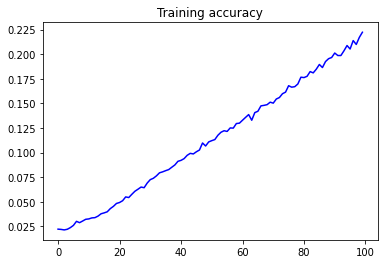

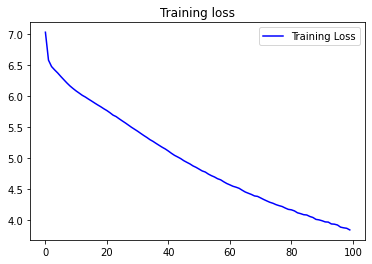

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [13]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope which then i see will thee lies grow light new sight ' rare afloat more more rare ' in all or dote quite deceive stay more light behind ' near crime more more of ' back and up red of his west doth give ill part his love in every part do it lies fled quite place still still lies gone up in thee pride grow white to hell stay than light crime crime mother mother of back of more sweet ' ' still of his thee red of ill light rare rare note rare bars doth mother his doom
